In [11]:
from pyopenms import *
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = "".join([l.strip() for l in open("uniprot-yourlist_M202201064ABAA9BC7178C81CEBC9459510EDDEA33B6A35V.fasta").readlines()[1:]])
bsa = AASequence.fromString(bsa)

result = []
dig.digest(bsa, result)

for s in result:
    print(s.toString())

MVCLK
LPGGSCMTALTVTLMVLSSPLALSGDTRPR
FLWQPK
R
ECHFFNGTER
VR
FLDR
YFYNQEESVR
FDSDVGEFR
AVTELGRPDAEYWNSQK
DILEQAR
AAVDTYCR
HNYGVVESFTVQR
R
VQPK
VTVYPSK
TQPLQHHNLLVCSVSGFYPGSIEVR
WFLNGQEEK
AGMVSTGLIQNGDWTFQTLVMLETVPR
SGEVYTCQVEHPSVTSPLTVEWR
AR
SESAQSK
MLSGVGGFVLGLLFLGAGLFIYFR
NQK
GHSGLQPTGFLS


In [12]:
listofpeptides = []
listofspectrum = []
for s in result:
    print(s.toString())
    tsg = TheoreticalSpectrumGenerator()
    spect1 = MSSpectrum()
    peptide = AASequence.fromString(s.toString())
    p = tsg.getParameters()
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spect1,peptide,1,1)
    
    if(len(s.toString())>5):
        listofpeptides.append(peptide)
        listofspectrum.append(spect1)
    print("Spectrum 1 of", peptide, "has", spect1.size(), "peaks.")
    for ion, peak in zip(spect1.getStringDataArrays()[0], spect1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())

MVCLK
Spectrum 1 of MVCLK has 7 peaks.
y1+ is generated at m/z 147.112804913371
b2+ is generated at m/z 231.11617577097098
y2+ is generated at m/z 260.196869264271
b3+ is generated at m/z 334.12536066047096
y3+ is generated at m/z 363.206054153771
b4+ is generated at m/z 447.20942501137097
y4+ is generated at m/z 462.274468440871
LPGGSCMTALTVTLMVLSSPLALSGDTRPR
Spectrum 1 of LPGGSCMTALTVTLMVLSSPLALSGDTRPR has 57 peaks.
y1+ is generated at m/z 175.118952913371
b2+ is generated at m/z 211.144105040971
b3+ is generated at m/z 268.165569136671
y2+ is generated at m/z 272.171717136671
b4+ is generated at m/z 325.18703323237105
b5+ is generated at m/z 412.21906239187103
y3+ is generated at m/z 428.27282851947103
b6+ is generated at m/z 515.2282472813711
y4+ is generated at m/z 529.320507742771
y5+ is generated at m/z 644.347451902271
b7+ is generated at m/z 646.268732298471
y6+ is generated at m/z 701.368915997971
b8+ is generated at m/z 747.316411521771
y7+ is generated at m/z 788.4009451574

In [13]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

     
**********
Numbers of matched peaks: 14
350.00225438061034
1203.920887155853
Ther Is No Intensity
     
**********
Numbers of matched peaks: 5
223.0499267578125
1373.732421875
     
**********
Numbers of matched peaks: 14
350.00225436810297
1203.9208871561561
     
**********
Numbers of matched peaks: 19
350.00225412782174
1203.920887150208
Ther Is No Intensity
     
**********
Numbers of matched peaks: 12
100.36868286132812
741.901123046875
     
**********
Numbers of matched peaks: 13
350.0022542478023
1203.920887156339
     
**********
Numbers of matched peaks: 17
350.0022543459404
1203.920887150975
Ther Is No Intensity
     
**********
Numbers of matched peaks: 19
350.00225433548485
1203.9208871578408
     
**********
Numbers of matched peaks: 5
174.19906616210938
918.5387573242188
     
**********
Numbers of matched peaks: 17
350.0022546666937
1203.9208871531257
Ther Is No Intensity


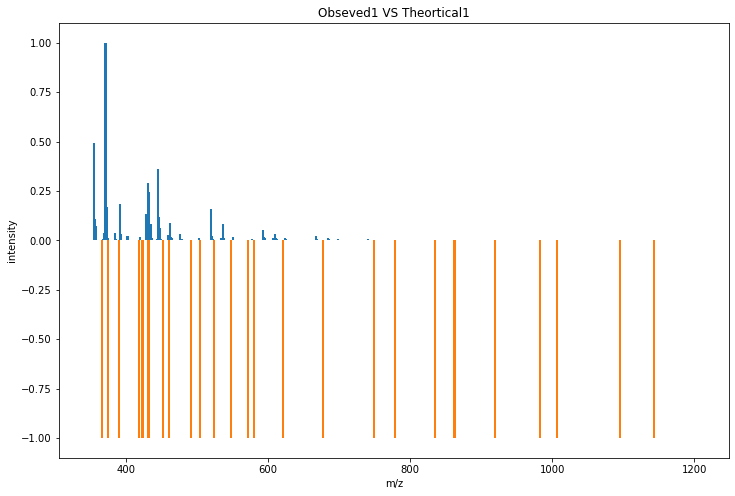

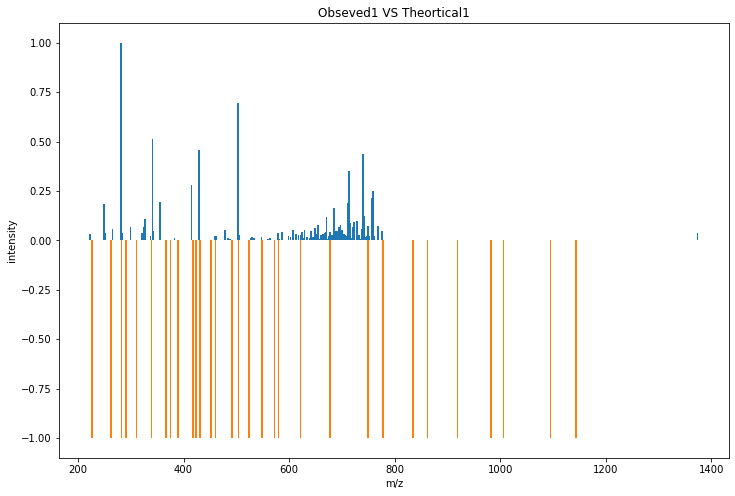

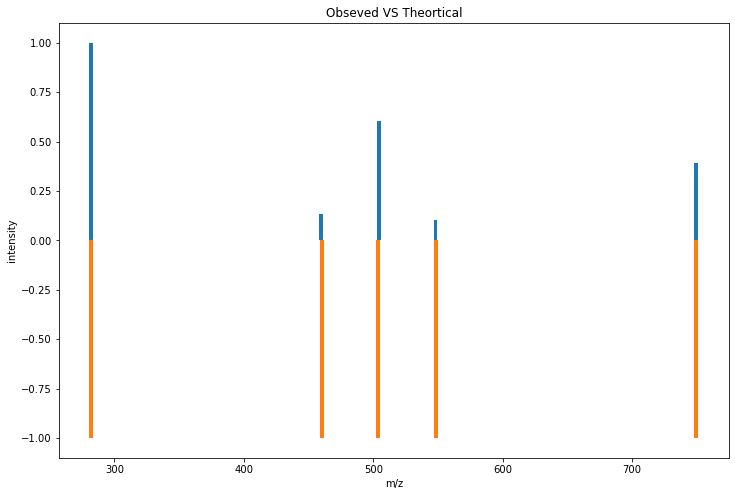

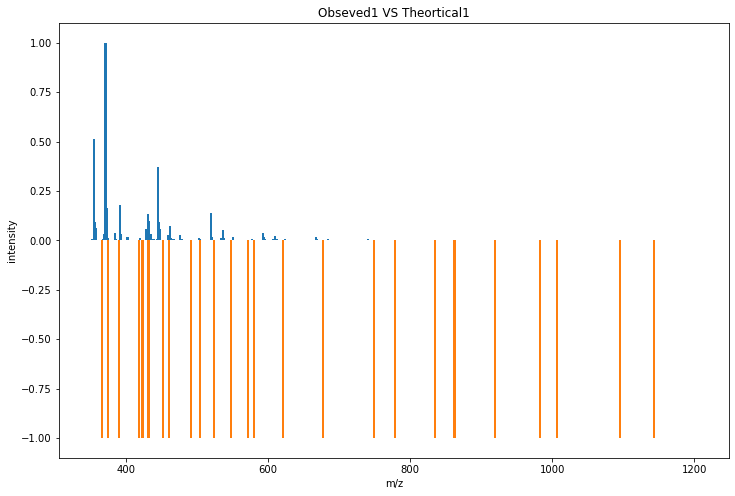

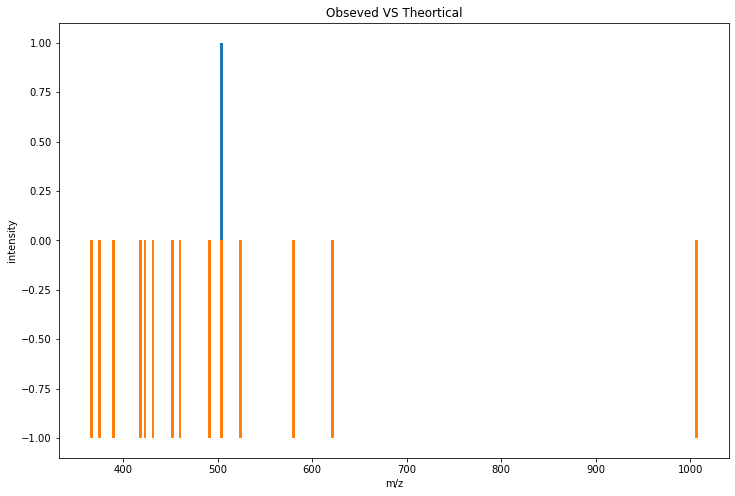

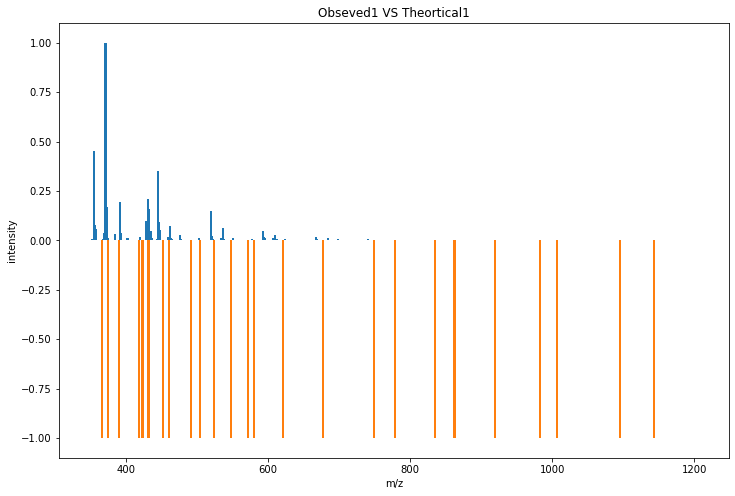

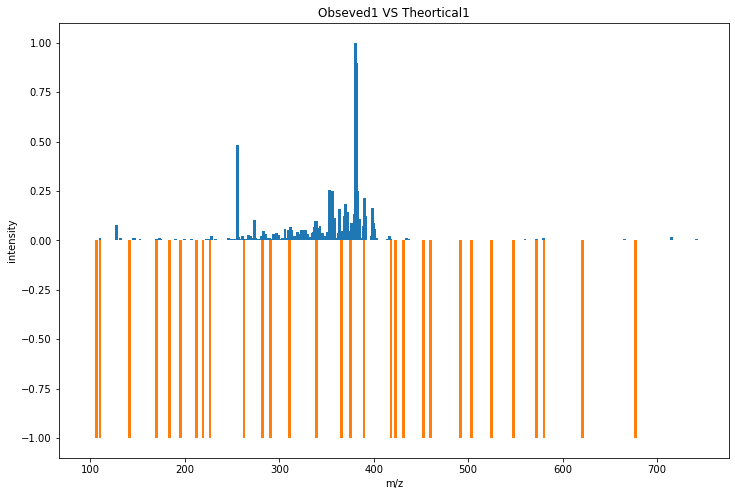

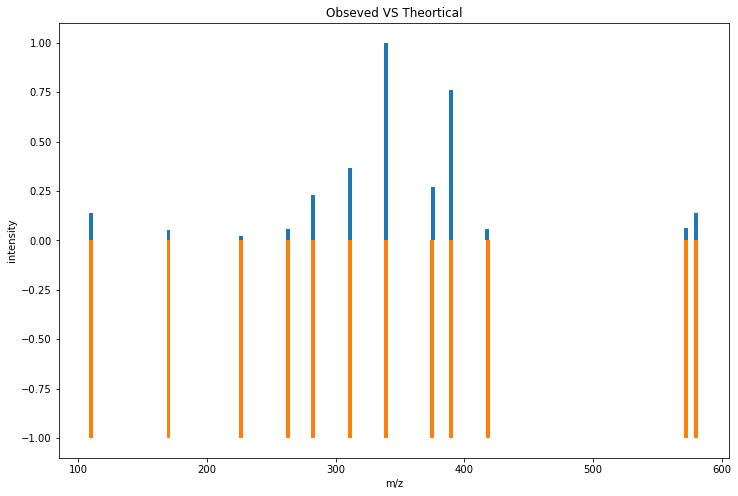

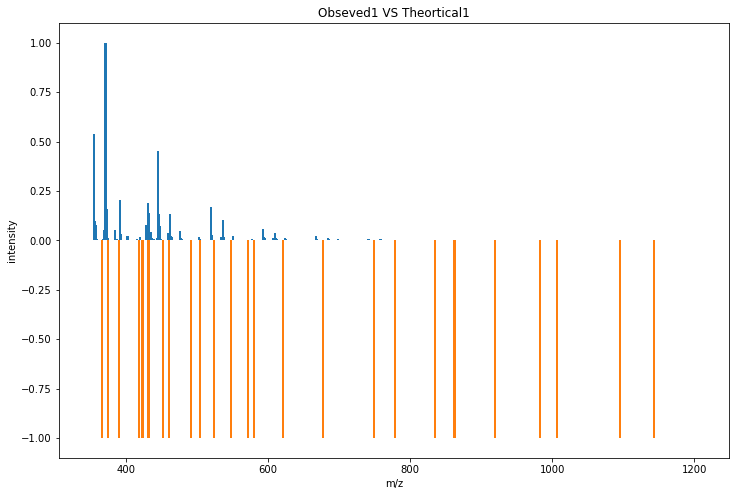

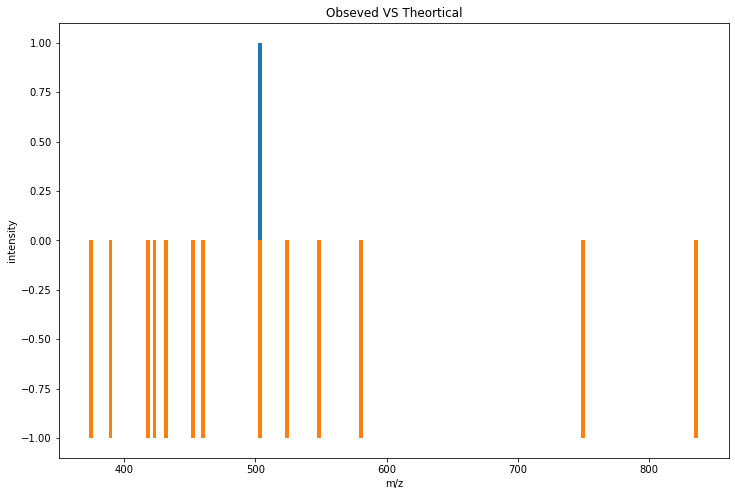

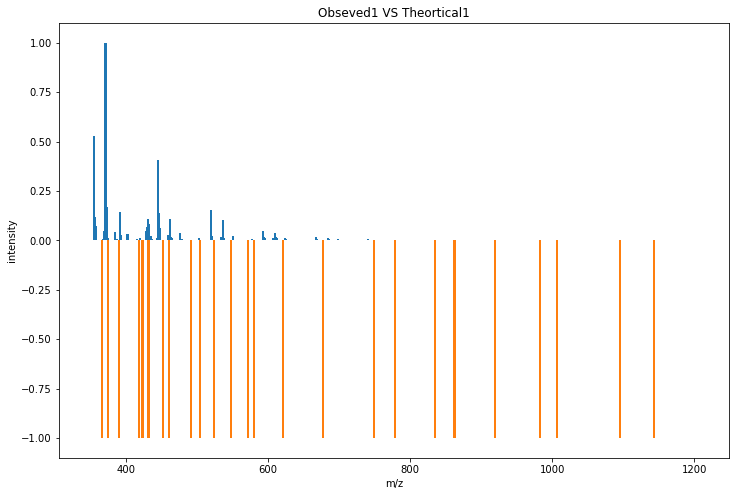

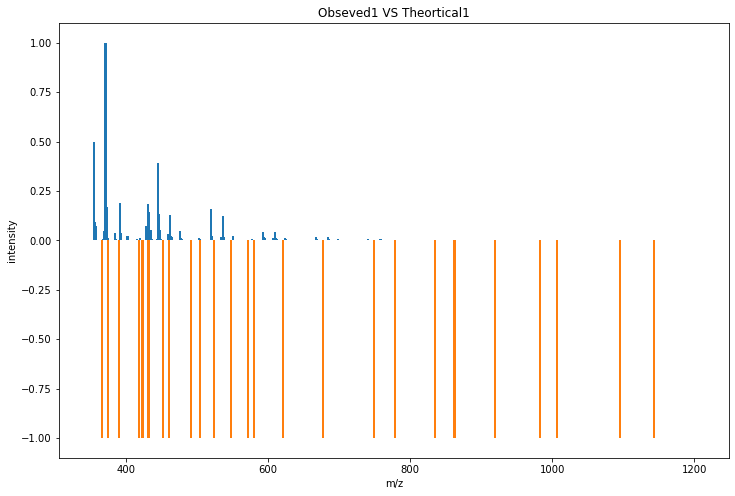

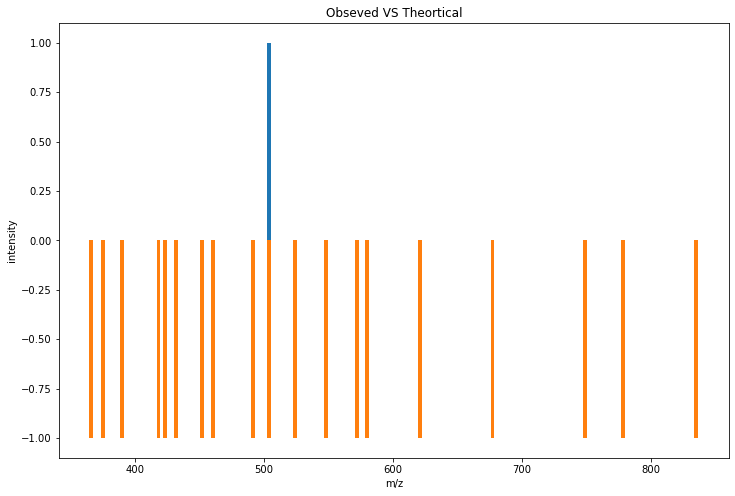

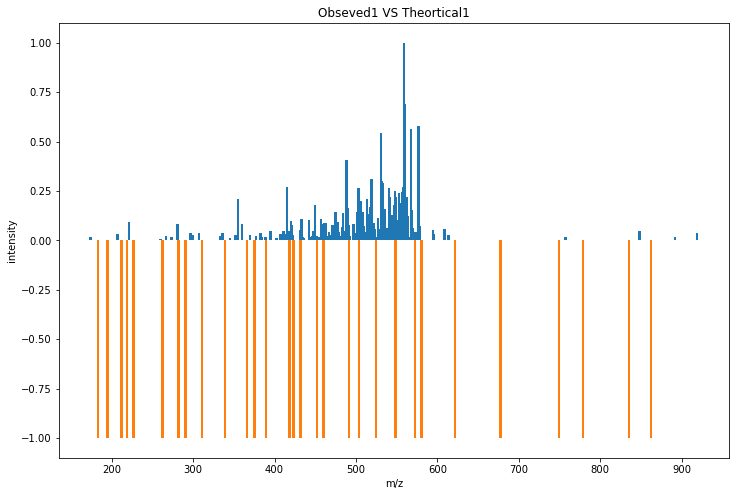

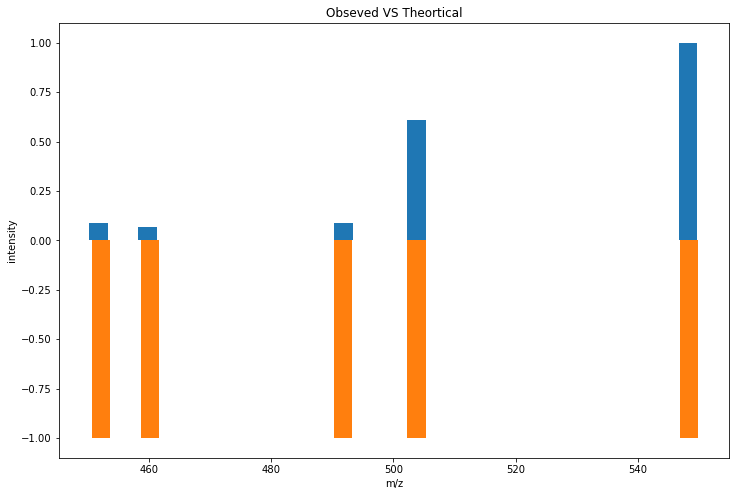

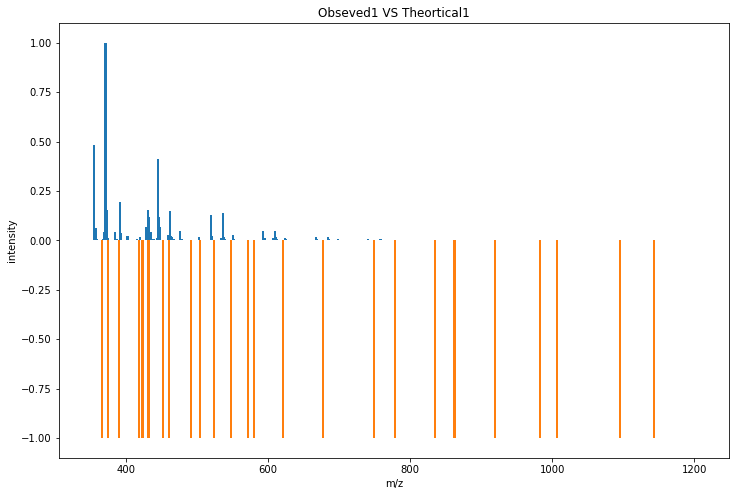

In [15]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("PDX_claseI_Fr75_20210519_01.mzML", exp)
for i in range(240,250):
    spectra = exp.getSpectra()
    observed_spectrum = spectra[i]
    max1=0
    for i in listofpeptides:
        tsg = TheoreticalSpectrumGenerator()
        spect1 = MSSpectrum()
        peptide = AASequence.fromString(s.toString())
        p = tsg.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spect1,peptide,1,2)
        
        alignment=[]
        spa=SpectrumAlignment()
        p=spa.getParameters()
        p.setValue("tolerance",0.5)
        p.setValue("is_relative_tolerance","false")
        spa.setParameters(p)
        spa.getSpectrumAlignment(alignment,spect1,observed_spectrum)
        if max1<len(alignment):
            max1=len(alignment)
            pp=i
    
    tsg = TheoreticalSpectrumGenerator()
    spect1 = MSSpectrum()
    peptide = AASequence.fromString(s.toString())
    p = tsg.getParameters()
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spect1,peptide,1,2)
    alignment=[]
    spa=SpectrumAlignment()
    p=spa.getParameters()
    p.setValue("tolerance",0.5)
    p.setValue("is_relative_tolerance","false")
    spa.setParameters(p)
    spa.getSpectrumAlignment(alignment,spect1,observed_spectrum)
    
    obs_mz,obs_int=observed_spectrum.get_peaks()
    print("     ")
    print("*"*10)
    print("Numbers of matched peaks:",len(alignment))
    print(min(obs_mz))
    print(max(obs_mz))
    theo_mz,theo_int=[],[]
    
    theo_mz,theo_int =[],[]
    for mz,intensity in zip(*spect1.get_peaks()):
        if mz>=min(obs_mz) and mz<=max(obs_mz):
            theo_mz.append(mz)
            theo_int.append(intensity)
            
    title="Obseved1 VS Theortical1"
    mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title)

    theo_mz,theo_int,obs_mz,obs_int=[],[],[],[]
    for theo_idx,obs_idx in alignment:
            theo_mz.append(spect1[theo_idx].getMZ())
            theo_int.append(spect1[theo_idx].getIntensity())

            obs_mz.append(observed_spectrum [obs_idx].getMZ())
            obs_int.append(observed_spectrum [obs_idx].getIntensity())
    if((max(obs_int))==0):
        print("Ther Is No Intensity")
    else:
               title="Obseved VS Theortical" 
               mirror_plot(obs_mz,obs_int,theo_mz,theo_int,title)


